### Atividade de algoritmo de classificação

##### Luiz Nagata RA: 210553
##### Jéssica Nagata RA: 210552
##### Nicoli Carvalho RA: 210341

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score

In [5]:
#loading dataset
dados = pd.read_csv("HBAT - KNN.csv")
dados

,Unnamed: 0,id,x1,x2_original,x2,x3_original,x3,x4_original,x4,x5_original,...,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23
0,1,1,1 to 5 years,Magazine industry,0,Large (500+),1,Outside North America,0,Direct to customer,...,4.7,4.3,5.0,5.1,3.7,8.2,8.0,8.4,65.1,"Yes, would consider"
1,2,2,Over 5 years,Newsprint industry,1,Small (0 to 499),0,USA/North America,1,Indirect through broker,...,5.5,4.0,3.9,4.3,4.9,5.7,6.5,7.5,67.1,"No, would not consider"
2,3,3,Over 5 years,Magazine industry,0,Large (500+),1,Outside North America,0,Direct to customer,...,6.2,4.6,5.4,4.0,4.5,8.9,8.4,9.0,72.1,"Yes, would consider"
3,4,4,Less than 1 year,Newsprint industry,1,Large (500+),1,Outside North America,0,Indirect through broker,...,7.0,3.6,4.3,4.1,3.0,4.8,6.0,7.2,40.1,"No, would not consider"
4,5,5,1 to 5 years,Magazine industry,0,Large (500+),1,USA/North America,1,Direct to customer,...,6.1,4.5,4.5,3.5,3.5,7.1,6.6,9.0,57.1,"No, would not consider"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,96,Less than 1 year,Newsprint industry,1,Small (0 to 499),0,USA/North America,1,Direct to customer,...,5.8,3.6,4.9,3.6,3.6,7.3,8.1,8.1,50.1,"Yes, would consider"
96,97,97,Less than 1 year,Magazine industry,0,Small (0 to 499),0,Outside North America,0,Direct to customer,...,4.5,6.4,4.2,5.6,3.7,6.3,5.5,7.2,48.1,"No, would not consider"
97,98,98,Less than 1 year,Magazine industry,0,Small (0 to 499),0,USA/North America,1,Direct to customer,...,5.0,4.3,3.1,2.9,2.5,5.4,7.0,7.7,51.1,"No, would not consider"
98,99,99,1 to 5 years,Newsprint industry,1,Small (0 to 499),0,Outside North America,0,Direct to customer,...,6.0,5.7,4.3,4.9,3.9,6.4,7.1,7.4,61.1,"No, would not consider"


## Considerando x2

#### Dividindo x e y

In [78]:
inputs = ['x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18']
x = dados[inputs]
y = dados['x2']

#### Separando bases de Treinamento e Teste, segundo um critério: 

In [79]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#### Rodar KNN

In [80]:
acuracia = []
precisao = []
sensibilidade = []
f1Score = []

for i in range(1,80):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    # Acurácia
    acuracia = acuracia + [accuracy_score(y_test, y_pred)]
    
    #Precisão
    precisao = precisao + [precision_score(y_test, y_pred)]
    
    #Sensibilidade
    sensibilidade = sensibilidade + [recall_score(y_test, y_pred)]
    
    #F1 Score
    f1Score = f1Score + [f1_score(y_test, y_pred)]


C:\Users\nicol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nicol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nicol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nicol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision 

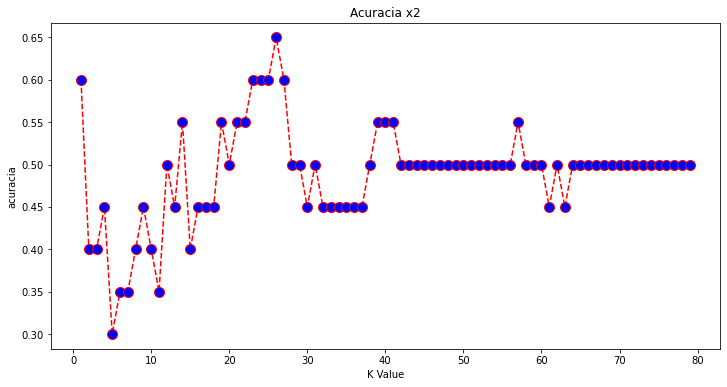

In [81]:
# Gráfico Acuracia
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 80), acuracia, color='red', linestyle='dashed', marker='o',  markerfacecolor='blue', markersize=10)
plt.title('Acuracia x2')  
plt.xlabel('K Value')  
plt.ylabel('acuracia')  
plt.show()

##### Calculando melhor K da acuracia

In [82]:
acuracia = pd.Series(acuracia)
acuracia.max()

0.65

In [83]:
acuracia_maximo = acuracia[acuracia==acuracia.max()]
idx = acuracia_maximo.index.max()
k = idx+1

In [84]:
k

26

Resposta - O melhor k é 26

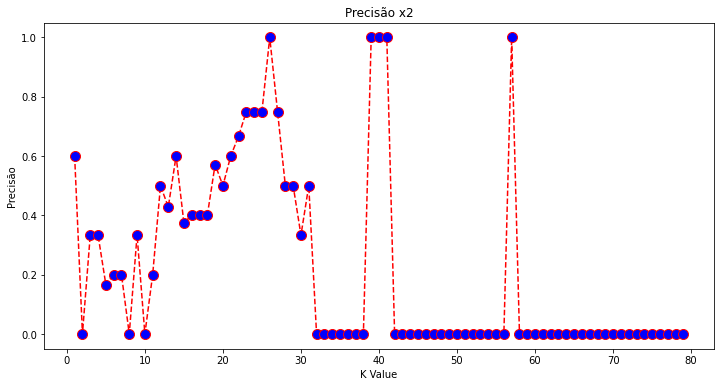

In [85]:
# Gráfico Precisão
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 80), precisao, color='red', linestyle='dashed', marker='o',  markerfacecolor='blue', markersize=10)
plt.title('Precisão x2')  
plt.xlabel('K Value')  
plt.ylabel('Precisão')  
plt.show()

##### Calculando melhor K de precisão

In [86]:
precisao = pd.Series(precisao)
precisao.max()

1.0

In [87]:
precisao_maximo = precisao[precisao==precisao.max()]
idx = precisao_maximo.index.max()
k = idx+1

In [88]:
k

57

Resposta - O melhor k é 57

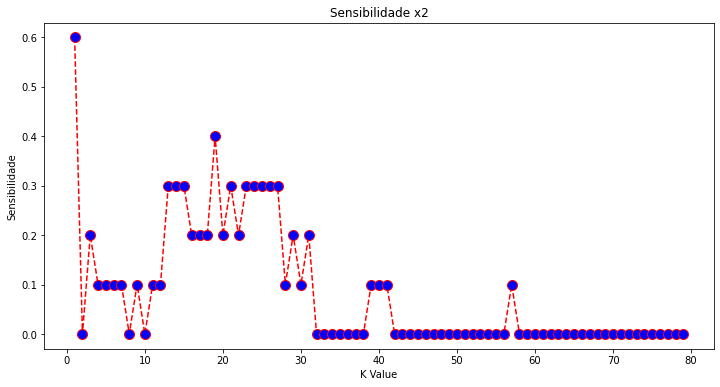

In [89]:
# Gráfico Sensibilidade
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 80), sensibilidade, color='red', linestyle='dashed', marker='o',  markerfacecolor='blue', markersize=10)
plt.title('Sensibilidade x2')  
plt.xlabel('K Value')  
plt.ylabel('Sensibilidade')  
plt.show()

##### Calculando melhor K de sensibilidade

In [90]:
sensibilidade = pd.Series(sensibilidade)
sensibilidade.max()

0.6

In [91]:
sensibilidade_maximo = sensibilidade[sensibilidade==sensibilidade.max()]
idx = sensibilidade_maximo.index.max()
k = idx+1

In [92]:
k

1

Resposta - O melhor k é 1

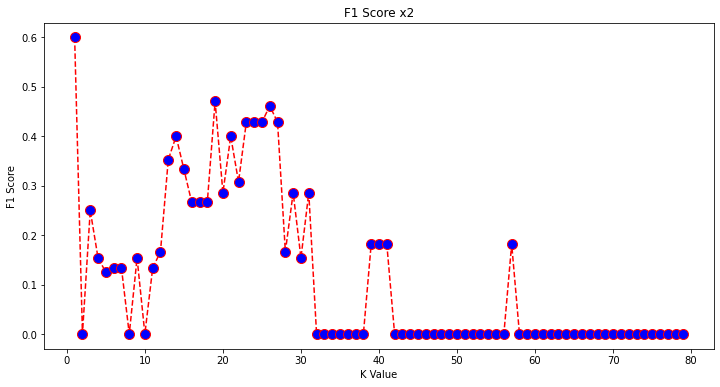

In [93]:
# Gráfico F1 Score
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 80), f1Score, color='red', linestyle='dashed', marker='o',  markerfacecolor='blue', markersize=10)
plt.title('F1 Score x2')  
plt.xlabel('K Value')  
plt.ylabel('F1 Score')  
plt.show()

##### Calculando melhor K de F1 Score

In [94]:
f1Score = pd.Series(f1Score)
f1Score.max()

0.6

In [95]:
f1Score_maximo = f1Score[f1Score==f1Score.max()]
idx = f1Score_maximo.index.max()
k = idx+1

In [96]:
k

1

Resposta - O melhor k é 1

## Considerando x3

#### Dividindo x e y

In [97]:
inputs = ['x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18']
x = dados[inputs]
y = dados['x3']

#### Separando bases de Treinamento e Teste, segundo um critério: 

In [98]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#### Rodar KNN

In [99]:
acuracia = []
precisao = []
sensibilidade = []
f1Score = []

for i in range(1,80):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    # Acurácia
    acuracia = acuracia + [accuracy_score(y_test, y_pred)]
    
    #Precisão
    precisao = precisao + [precision_score(y_test, y_pred)]
    
    #Sensibilidade
    sensibilidade = sensibilidade + [recall_score(y_test, y_pred)]
    
    #F1 Score
    f1Score = f1Score + [f1_score(y_test, y_pred)]


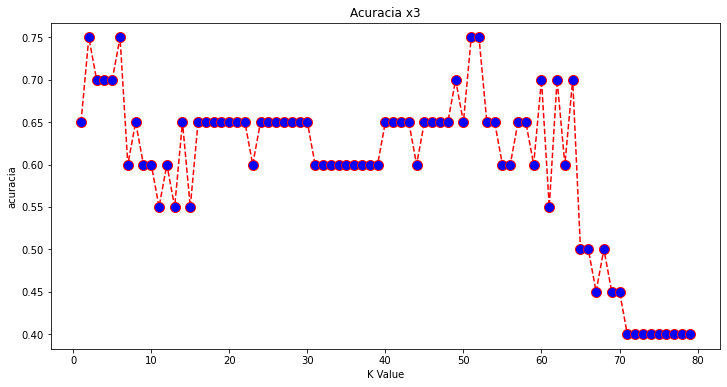

In [100]:
# Gráfico Acuracia
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 80), acuracia, color='red', linestyle='dashed', marker='o',  markerfacecolor='blue', markersize=10)
plt.title('Acuracia x3')  
plt.xlabel('K Value')  
plt.ylabel('acuracia')  
plt.show()

##### Calculando melhor K da acuracia

In [101]:
acuracia = pd.Series(acuracia)
acuracia.max()

0.75

In [102]:
acuracia_maximo = acuracia[acuracia==acuracia.max()]
idx = acuracia_maximo.index.max()
k = idx+1

In [103]:
k

52

Resposta - O melhor k é 52

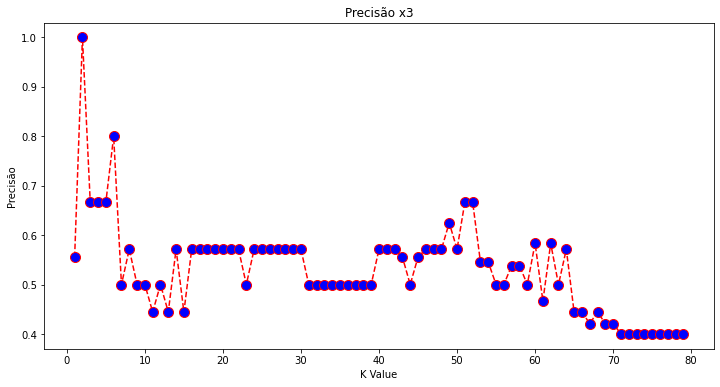

In [104]:
# Gráfico Precisão
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 80), precisao, color='red', linestyle='dashed', marker='o',  markerfacecolor='blue', markersize=10)
plt.title('Precisão x3')  
plt.xlabel('K Value')  
plt.ylabel('Precisão')  
plt.show()

##### Calculando melhor K de precisão

In [105]:
precisao = pd.Series(precisao)
precisao.max()

1.0

In [106]:
precisao_maximo = precisao[precisao==precisao.max()]
idx = precisao_maximo.index.max()
k = idx+1

In [107]:
k

2

Resposta - O melhor k é 2

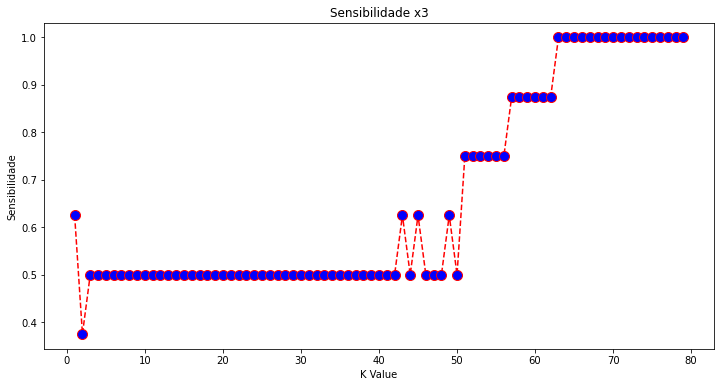

In [108]:
# Gráfico Sensibilidade
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 80), sensibilidade, color='red', linestyle='dashed', marker='o',  markerfacecolor='blue', markersize=10)
plt.title('Sensibilidade x3')  
plt.xlabel('K Value')  
plt.ylabel('Sensibilidade')  
plt.show()

##### Calculando melhor K de sensibilidade

In [109]:
sensibilidade = pd.Series(sensibilidade)
sensibilidade.max()

1.0

In [110]:
sensibilidade_maximo = sensibilidade[sensibilidade==sensibilidade.max()]
idx = sensibilidade_maximo.index.max()
k = idx+1

In [111]:
k

79

Resposta - O melhor k é 79

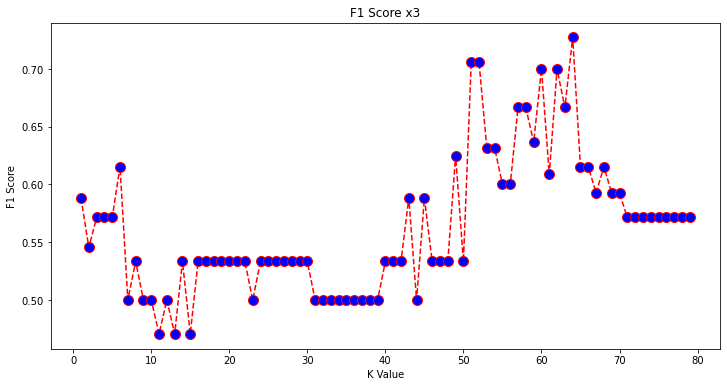

In [112]:
# Gráfico F1 Score
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 80), f1Score, color='red', linestyle='dashed', marker='o',  markerfacecolor='blue', markersize=10)
plt.title('F1 Score x3')  
plt.xlabel('K Value')  
plt.ylabel('F1 Score')  
plt.show()

##### Calculando melhor K de F1 Score

In [113]:
f1Score = pd.Series(f1Score)
f1Score.max()

0.7272727272727273

In [114]:
f1Score_maximo = f1Score[f1Score==f1Score.max()]
idx = f1Score_maximo.index.max()
k = idx+1

In [115]:
k

64

Resposta - O melhor k é 64

## Considerando x4

#### Dividindo x e y

In [116]:
inputs = ['x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18']
x = dados[inputs]
y = dados['x4']

#### Separando bases de Treinamento e Teste, segundo um critério: 

In [117]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#### Rodar KNN

In [118]:
acuracia = []
precisao = []
sensibilidade = []
f1Score = []

for i in range(1,80):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    # Acurácia
    acuracia = acuracia + [accuracy_score(y_test, y_pred)]
    
    #Precisão
    precisao = precisao + [precision_score(y_test, y_pred)]
    
    #Sensibilidade
    sensibilidade = sensibilidade + [recall_score(y_test, y_pred)]
    
    #F1 Score
    f1Score = f1Score + [f1_score(y_test, y_pred)]


C:\Users\nicol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nicol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nicol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nicol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision 

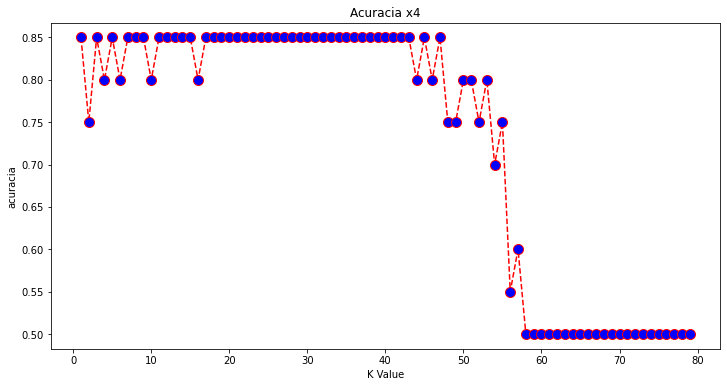

In [119]:
# Gráfico Acuracia
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 80), acuracia, color='red', linestyle='dashed', marker='o',  markerfacecolor='blue', markersize=10)
plt.title('Acuracia x4')  
plt.xlabel('K Value')  
plt.ylabel('acuracia')  
plt.show()

##### Calculando melhor K da acuracia

In [120]:
acuracia = pd.Series(acuracia)
acuracia.max()

0.85

In [121]:
acuracia_maximo = acuracia[acuracia==acuracia.max()]
idx = acuracia_maximo.index.max()
k = idx+1

In [122]:
k

47

Resposta - O melhor k é 47

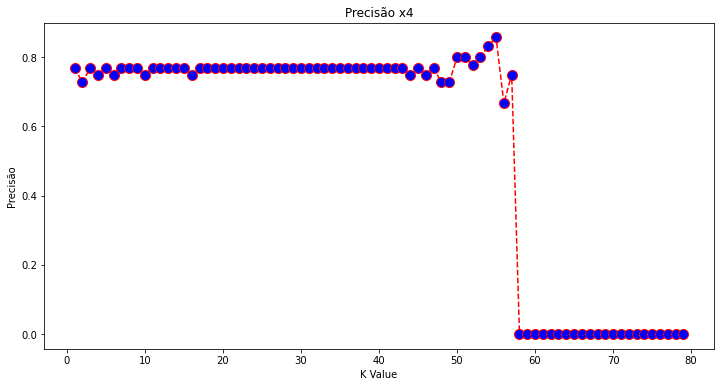

In [123]:
# Gráfico Precisão
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 80), precisao, color='red', linestyle='dashed', marker='o',  markerfacecolor='blue', markersize=10)
plt.title('Precisão x4')  
plt.xlabel('K Value')  
plt.ylabel('Precisão')  
plt.show()

##### Calculando melhor K de precisão

In [124]:
precisao = pd.Series(precisao)
precisao.max()

0.8571428571428571

In [125]:
precisao_maximo = precisao[precisao==precisao.max()]
idx = precisao_maximo.index.max()
k = idx+1

In [126]:
k

55

Resposta - O melhor k é 55

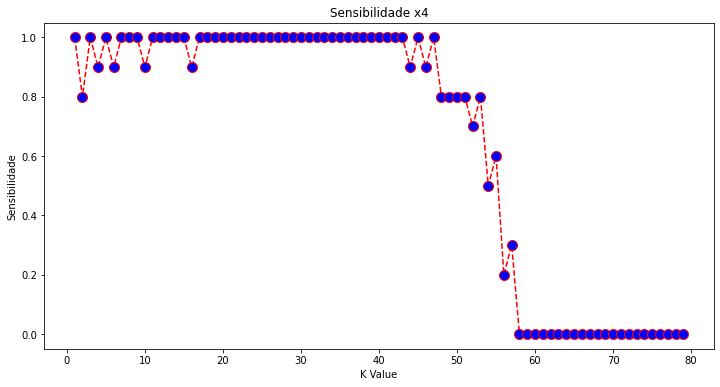

In [127]:
# Gráfico Sensibilidade
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 80), sensibilidade, color='red', linestyle='dashed', marker='o',  markerfacecolor='blue', markersize=10)
plt.title('Sensibilidade x4')  
plt.xlabel('K Value')  
plt.ylabel('Sensibilidade')  
plt.show()

##### Calculando melhor K de sensibilidade

In [128]:
sensibilidade = pd.Series(sensibilidade)
sensibilidade.max()

1.0

In [129]:
sensibilidade_maximo = sensibilidade[sensibilidade==sensibilidade.max()]
idx = sensibilidade_maximo.index.max()
k = idx+1

In [130]:
k

47

Resposta - O melhor k é 47

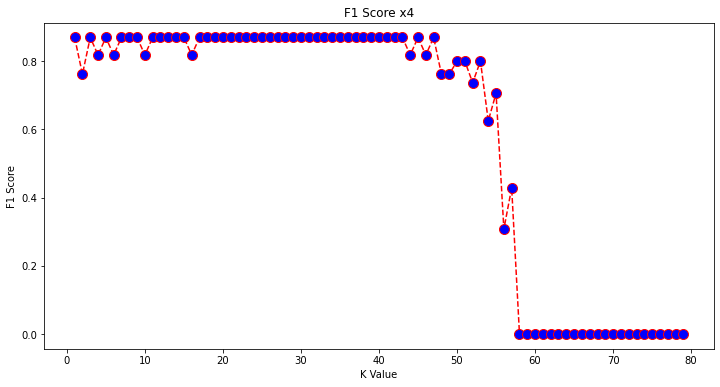

In [131]:
# Gráfico F1 Score
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 80), f1Score, color='red', linestyle='dashed', marker='o',  markerfacecolor='blue', markersize=10)
plt.title('F1 Score x4')  
plt.xlabel('K Value')  
plt.ylabel('F1 Score')  
plt.show()

##### Calculando melhor K de F1 Score

In [132]:
f1Score = pd.Series(f1Score)
f1Score.max()

0.8695652173913044

In [133]:
f1Score_maximo = f1Score[f1Score==f1Score.max()]
idx = f1Score_maximo.index.max()
k = idx+1

In [134]:
k

47

Resposta - O melhor k é 47

## Considerando x5

#### Dividindo x e y

In [135]:
inputs = ['x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18']
x = dados[inputs]
y = dados['x5']

#### Separando bases de Treinamento e Teste, segundo um critério: 

In [136]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#### Rodar KNN

In [137]:
acuracia = []
precisao = []
sensibilidade = []
f1Score = []

for i in range(1,80):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    # Acurácia
    acuracia = acuracia + [accuracy_score(y_test, y_pred)]
    
    #Precisão
    precisao = precisao + [precision_score(y_test, y_pred)]
    
    #Sensibilidade
    sensibilidade = sensibilidade + [recall_score(y_test, y_pred)]
    
    #F1 Score
    f1Score = f1Score + [f1_score(y_test, y_pred)]


C:\Users\nicol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nicol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nicol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nicol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision 

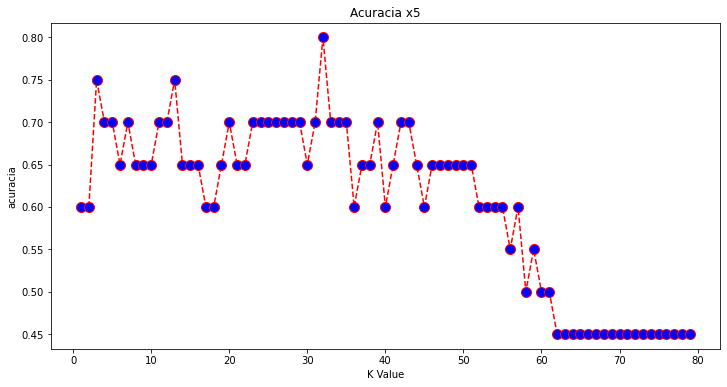

In [138]:
# Gráfico Acuracia
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 80), acuracia, color='red', linestyle='dashed', marker='o',  markerfacecolor='blue', markersize=10)
plt.title('Acuracia x5')  
plt.xlabel('K Value')  
plt.ylabel('acuracia')  
plt.show()

##### Calculando melhor K da acuracia

In [139]:
acuracia = pd.Series(acuracia)
acuracia.max()

0.8

In [140]:
acuracia_maximo = acuracia[acuracia==acuracia.max()]
idx = acuracia_maximo.index.max()
k = idx+1

In [141]:
k

32

Resposta - O melhor k é 32

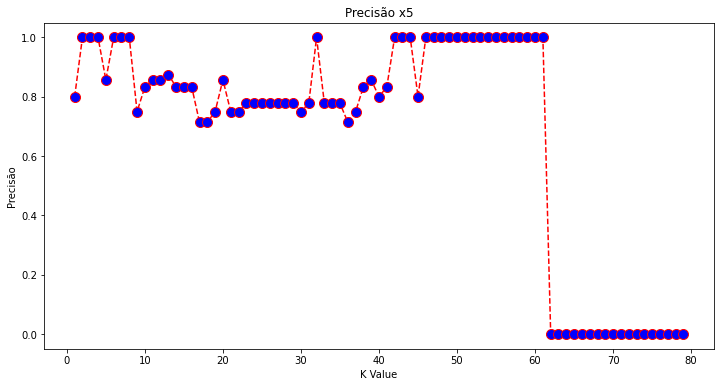

In [142]:
# Gráfico Precisão
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 80), precisao, color='red', linestyle='dashed', marker='o',  markerfacecolor='blue', markersize=10)
plt.title('Precisão x5')  
plt.xlabel('K Value')  
plt.ylabel('Precisão')  
plt.show()

##### Calculando melhor K de precisão

In [143]:
precisao = pd.Series(precisao)
precisao.max()

1.0

In [144]:
precisao_maximo = precisao[precisao==precisao.max()]
idx = precisao_maximo.index.max()
k = idx+1

In [145]:
k

61

Resposta - O melhor k é 61

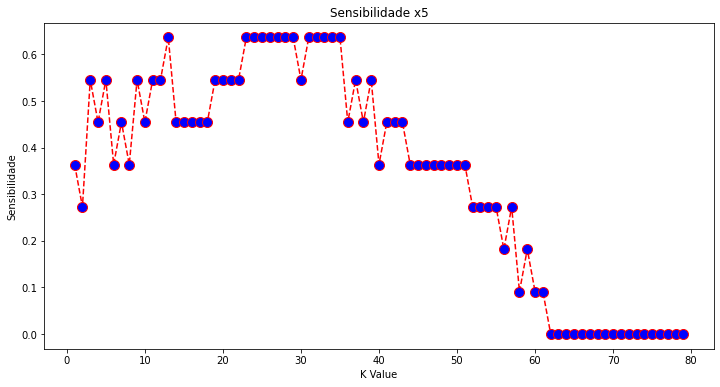

In [146]:
# Gráfico Sensibilidade
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 80), sensibilidade, color='red', linestyle='dashed', marker='o',  markerfacecolor='blue', markersize=10)
plt.title('Sensibilidade x5')  
plt.xlabel('K Value')  
plt.ylabel('Sensibilidade')  
plt.show()

##### Calculando melhor K de sensibilidade

In [147]:
sensibilidade = pd.Series(sensibilidade)
sensibilidade.max()

0.6363636363636364

In [148]:
sensibilidade_maximo = sensibilidade[sensibilidade==sensibilidade.max()]
idx = sensibilidade_maximo.index.max()
k = idx+1

In [149]:
k

35

Resposta - O melhor k é 35

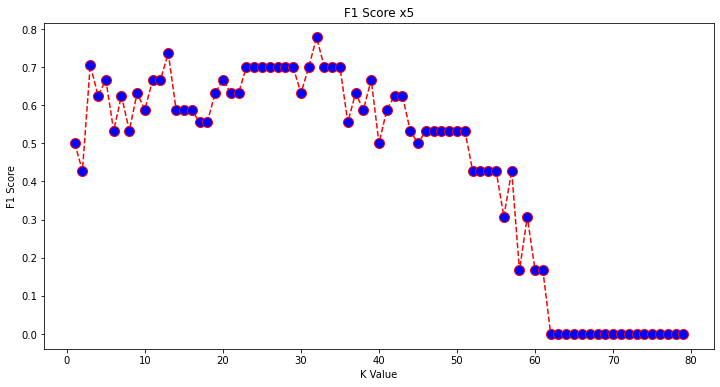

In [150]:
# Gráfico F1 Score
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 80), f1Score, color='red', linestyle='dashed', marker='o',  markerfacecolor='blue', markersize=10)
plt.title('F1 Score x5')  
plt.xlabel('K Value')  
plt.ylabel('F1 Score')  
plt.show()

##### Calculando melhor K de F1 Score

In [151]:
f1Score = pd.Series(f1Score)
f1Score.max()

0.7777777777777778

In [152]:
f1Score_maximo = f1Score[f1Score==f1Score.max()]
idx = f1Score_maximo.index.max()
k = idx+1

In [153]:
k

32

Resposta - O melhor k é 32